In [ ]:
import yaml
import pandas as pd
import numpy as np
import re

# exp_name = "GNNv3_v14_tuner_config_Criteo_distill"
# exp_name = "GNNv3_v17_tuner_config_Criteo"
# exp_name = "GNNv3_v19_tuner_config_Criteo"
# exp_name = "FinalNet_tuner_config_Criteo2"

# exp_name = "SCV_ada_tf_tuner_config_Criteo"
# exp_name = "SCV_heavy_loca_tuner_config_Criteo"
# exp_name = "SCV_light_loca_tuner_config_Criteo"
# exp_name = "SCV_light_loca_adadis_Criteo"
exp_name = "SCV_light_loca_adadis_tuner_config_Criteo"

# exp_name = "GNNv3_v14_tuner_config_Avazu"
# exp_name = "GNNv3_v14_tuner_config_Avazu3"
# exp_name = "GNNv3_v14_tuner_config_iPinYou_heavy"
# exp_name = "GNNv3_v14_tuner_config_iPinYou3"
# exp_name = "GNNv3_v14_tuner_config_iPinYou"
# exp_name = "GNNv3_v8_tuner_confi2g_iPinYou"
df_path = exp_name+".csv"
config_path = f"config/{exp_name}/model_config.yaml"

In [2]:
exp_df = pd.read_csv(df_path, names=["timestamp", "command", "exp_id", "dataset_id", "train", "val", "test"])
exp_df

,timestamp,command,exp_id,dataset_id,train,val,test
0,20250306-004129,[command] python run_expid.py --config config/...,[exp_id] SCV_light_loca_Criteo_005_1f0692d2,[dataset_id] Criteo_x4_10_h5,[train] N.A.,[val] logloss: 0.439172 - AUC: 0.812882,[test] logloss: 0.438714 - AUC: 0.813396
1,20250306-014140,[command] python run_expid.py --config config/...,[exp_id] SCV_light_loca_Criteo_124_e244a2ae,[dataset_id] Criteo_x4_10_h5,[train] N.A.,[val] logloss: 0.437641 - AUC: 0.814332,[test] logloss: 0.437181 - AUC: 0.814863
2,20250306-021947,[command] python run_expid.py --config config/...,[exp_id] SCV_light_loca_Criteo_063_47271828,[dataset_id] Criteo_x4_10_h5,[train] N.A.,[val] logloss: 0.437807 - AUC: 0.814193,[test] logloss: 0.437448 - AUC: 0.814605
3,20250306-022629,[command] python run_expid.py --config config/...,[exp_id] SCV_light_loca_Criteo_075_674f630b,[dataset_id] Criteo_x4_10_h5,[train] N.A.,[val] logloss: 0.437544 - AUC: 0.814384,[test] logloss: 0.437157 - AUC: 0.814830
4,20250306-023916,[command] python run_expid.py --config config/...,[exp_id] SCV_light_loca_Criteo_042_4eab620d,[dataset_id] Criteo_x4_10_h5,[train] N.A.,[val] logloss: 0.439140 - AUC: 0.813044,[test] logloss: 0.438648 - AUC: 0.813594
...,...,...,...,...,...,...,...
81,20250307-212131,[command] python run_expid.py --config config/...,[exp_id] SCV_light_loca_Criteo_138_f9bfb37a,[dataset_id] Criteo_x4_10_h5,[train] N.A.,[val] logloss: 0.437705 - AUC: 0.814264,[test] logloss: 0.437309 - AUC: 0.814724
82,20250307-215919,[command] python run_expid.py --config config/...,[exp_id] SCV_light_loca_Criteo_092_944ea551,[dataset_id] Criteo_x4_10_h5,[train] N.A.,[val] logloss: 0.437643 - AUC: 0.814350,[test] logloss: 0.437264 - AUC: 0.814779
83,20250307-224951,[command] python run_expid.py --config config/...,[exp_id] SCV_light_loca_Criteo_013_86efd47c,[dataset_id] Criteo_x4_10_h5,[train] N.A.,[val] logloss: 0.438590 - AUC: 0.813381,[test] logloss: 0.438222 - AUC: 0.813783
84,20250307-230228,[command] python run_expid.py --config config/...,[exp_id] SCV_light_loca_Criteo_103_bb626fbf,[dataset_id] Criteo_x4_10_h5,[train] N.A.,[val] logloss: 0.437703 - AUC: 0.814201,[test] logloss: 0.437157 - AUC: 0.814783


In [3]:
exp_df = exp_df[["exp_id", "test"]]
exp_df["exp_id"] = exp_df["exp_id"].apply(lambda x: str(x.split("[exp_id]")[1]).strip())
exp_df["test"] = exp_df["test"].apply(lambda x: x.split("[test]")[1])
exp_df["test"] = exp_df["test"].apply(lambda x: [eval(item) for item in re.findall(r"\d+\.\d+|\d+", x)])
exp_df[['logloss', 'AUC']] = pd.DataFrame(exp_df['test'].to_list(), index=exp_df.index)
del exp_df["test"]
exp_df

/tmp/ipykernel_1142667/2652527789.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_df["exp_id"] = exp_df["exp_id"].apply(lambda x: str(x.split("[exp_id]")[1]).strip())
/tmp/ipykernel_1142667/2652527789.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_df["test"] = exp_df["test"].apply(lambda x: x.split("[test]")[1])
/tmp/ipykernel_1142667/2652527789.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

,exp_id,logloss,AUC
0,SCV_light_loca_Criteo_005_1f0692d2,0.438714,0.813396
1,SCV_light_loca_Criteo_124_e244a2ae,0.437181,0.814863
2,SCV_light_loca_Criteo_063_47271828,0.437448,0.814605
3,SCV_light_loca_Criteo_075_674f630b,0.437157,0.814830
4,SCV_light_loca_Criteo_042_4eab620d,0.438648,0.813594
...,...,...,...
81,SCV_light_loca_Criteo_138_f9bfb37a,0.437309,0.814724
82,SCV_light_loca_Criteo_092_944ea551,0.437264,0.814779
83,SCV_light_loca_Criteo_013_86efd47c,0.438222,0.813783
84,SCV_light_loca_Criteo_103_bb626fbf,0.437157,0.814783


In [4]:
with open(config_path) as f:
    config_lst = yaml.load(f, Loader=yaml.FullLoader)
hyperparam_keys = list(list(config_lst.values())[0].keys())
total_exp_len = len(config_lst)
hyperparam_keys

['alpha',
 'batch_norm',
 'batch_size',
 'dataset_id',
 'debug_mode',
 'distill_loss',
 'early_stop_patience',
 'embedding_dim',
 'embedding_regularizer',
 'epochs',
 'eval_steps',
 'feature_config',
 'feature_specs',
 'group_id',
 'layer_norm',
 'learning_rate',
 'loss',
 'metrics',
 'model',
 'model_root',
 'monitor',
 'monitor_mode',
 'net_dropout',
 'net_regularizer',
 'num_hops',
 'num_mask',
 'num_tower',
 'num_workers',
 'optimizer',
 'pickle_feature_encoder',
 'pooling_method',
 'save_best_only',
 'seed',
 'shuffle',
 'task',
 'use_bilinear_fusion',
 'use_features',
 'verbose']

In [5]:
config_df = pd.DataFrame(config_lst).T
config_df["exp_id"] = config_df.index
config_df["exp_id"] = config_df["exp_id"].apply(lambda x : str(x).strip())
config_df

,alpha,batch_norm,batch_size,dataset_id,debug_mode,distill_loss,early_stop_patience,embedding_dim,embedding_regularizer,epochs,...,pickle_feature_encoder,pooling_method,save_best_only,seed,shuffle,task,use_bilinear_fusion,use_features,verbose,exp_id
SCV_light_loca_Criteo_001_90d7f407,0.9,True,4096,Criteo_x4_10_h5_49cec1bd,False,True,2,16,0.00001,100,...,True,attn,True,2024,True,binary_classification,True,None,1,SCV_light_loca_Criteo_001_90d7f407
SCV_light_loca_Criteo_002_f79e460e,0.7,True,4096,Criteo_x4_10_h5_49cec1bd,False,True,2,16,0.00001,100,...,True,attn,True,2024,True,binary_classification,True,None,1,SCV_light_loca_Criteo_002_f79e460e
SCV_light_loca_Criteo_003_4b3e3b1b,0.5,True,4096,Criteo_x4_10_h5_49cec1bd,False,True,2,16,0.00001,100,...,True,attn,True,2024,True,binary_classification,True,None,1,SCV_light_loca_Criteo_003_4b3e3b1b
SCV_light_loca_Criteo_004_06818ac8,0.3,True,4096,Criteo_x4_10_h5_49cec1bd,False,True,2,16,0.00001,100,...,True,attn,True,2024,True,binary_classification,True,None,1,SCV_light_loca_Criteo_004_06818ac8
SCV_light_loca_Criteo_005_1f0692d2,0.9,True,4096,Criteo_x4_10_h5_49cec1bd,False,True,2,16,0.00001,100,...,True,attn,True,2024,True,binary_classification,True,None,1,SCV_light_loca_Criteo_005_1f0692d2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SCV_light_loca_Criteo_140_39d982b1,0.3,True,4096,Criteo_x4_10_h5_49cec1bd,False,True,2,16,0.00001,100,...,True,attn,True,2024,True,binary_classification,True,None,1,SCV_light_loca_Criteo_140_39d982b1
SCV_light_loca_Criteo_141_c22bac84,0.9,True,4096,Criteo_x4_10_h5_49cec1bd,False,True,2,16,0.00001,100,...,True,attn,True,2024,True,binary_classification,True,None,1,SCV_light_loca_Criteo_141_c22bac84
SCV_light_loca_Criteo_142_acdd44d8,0.7,True,4096,Criteo_x4_10_h5_49cec1bd,False,True,2,16,0.00001,100,...,True,attn,True,2024,True,binary_classification,True,None,1,SCV_light_loca_Criteo_142_acdd44d8
SCV_light_loca_Criteo_143_fce95125,0.5,True,4096,Criteo_x4_10_h5_49cec1bd,False,True,2,16,0.00001,100,...,True,attn,True,2024,True,binary_classification,True,None,1,SCV_light_loca_Criteo_143_fce95125


In [6]:
exp_df

,exp_id,logloss,AUC
0,SCV_light_loca_Criteo_005_1f0692d2,0.438714,0.813396
1,SCV_light_loca_Criteo_124_e244a2ae,0.437181,0.814863
2,SCV_light_loca_Criteo_063_47271828,0.437448,0.814605
3,SCV_light_loca_Criteo_075_674f630b,0.437157,0.814830
4,SCV_light_loca_Criteo_042_4eab620d,0.438648,0.813594
...,...,...,...
81,SCV_light_loca_Criteo_138_f9bfb37a,0.437309,0.814724
82,SCV_light_loca_Criteo_092_944ea551,0.437264,0.814779
83,SCV_light_loca_Criteo_013_86efd47c,0.438222,0.813783
84,SCV_light_loca_Criteo_103_bb626fbf,0.437157,0.814783


In [7]:
df = pd.merge(exp_df, config_df, on="exp_id")
df

,exp_id,logloss,AUC,alpha,batch_norm,batch_size,dataset_id,debug_mode,distill_loss,early_stop_patience,...,optimizer,pickle_feature_encoder,pooling_method,save_best_only,seed,shuffle,task,use_bilinear_fusion,use_features,verbose
0,SCV_light_loca_Criteo_005_1f0692d2,0.438714,0.813396,0.9,True,4096,Criteo_x4_10_h5_49cec1bd,False,True,2,...,adam,True,attn,True,2024,True,binary_classification,True,None,1
1,SCV_light_loca_Criteo_124_e244a2ae,0.437181,0.814863,0.3,True,4096,Criteo_x4_10_h5_49cec1bd,False,True,2,...,adam,True,attn,True,2024,True,binary_classification,True,None,1
2,SCV_light_loca_Criteo_063_47271828,0.437448,0.814605,0.5,True,4096,Criteo_x4_10_h5_49cec1bd,False,True,2,...,adam,True,attn,True,2024,True,binary_classification,True,None,1
3,SCV_light_loca_Criteo_075_674f630b,0.437157,0.814830,0.5,True,4096,Criteo_x4_10_h5_49cec1bd,False,True,2,...,adam,True,attn,True,2024,True,binary_classification,True,None,1
4,SCV_light_loca_Criteo_042_4eab620d,0.438648,0.813594,0.7,True,4096,Criteo_x4_10_h5_49cec1bd,False,True,2,...,adam,True,attn,True,2024,True,binary_classification,True,None,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,SCV_light_loca_Criteo_138_f9bfb37a,0.437309,0.814724,0.7,True,4096,Criteo_x4_10_h5_49cec1bd,False,True,2,...,adam,True,attn,True,2024,True,binary_classification,True,None,1
82,SCV_light_loca_Criteo_092_944ea551,0.437264,0.814779,0.3,True,4096,Criteo_x4_10_h5_49cec1bd,False,True,2,...,adam,True,attn,True,2024,True,binary_classification,True,None,1
83,SCV_light_loca_Criteo_013_86efd47c,0.438222,0.813783,0.9,True,4096,Criteo_x4_10_h5_49cec1bd,False,True,2,...,adam,True,attn,True,2024,True,binary_classification,True,None,1
84,SCV_light_loca_Criteo_103_bb626fbf,0.437157,0.814783,0.5,True,4096,Criteo_x4_10_h5_49cec1bd,False,True,2,...,adam,True,attn,True,2024,True,binary_classification,True,None,1


In [8]:
if "FinalNet" in exp_name:
    df["block1_hidden_units"] = df["block1_hidden_units"].apply(lambda x: str(x))
    df["block2_hidden_units"] = df["block2_hidden_units"].apply(lambda x: str(x))

In [9]:
df.head(5)

,exp_id,logloss,AUC,alpha,batch_norm,batch_size,dataset_id,debug_mode,distill_loss,early_stop_patience,...,optimizer,pickle_feature_encoder,pooling_method,save_best_only,seed,shuffle,task,use_bilinear_fusion,use_features,verbose
0,SCV_light_loca_Criteo_005_1f0692d2,0.438714,0.813396,0.9,True,4096,Criteo_x4_10_h5_49cec1bd,False,True,2,...,adam,True,attn,True,2024,True,binary_classification,True,None,1
1,SCV_light_loca_Criteo_124_e244a2ae,0.437181,0.814863,0.3,True,4096,Criteo_x4_10_h5_49cec1bd,False,True,2,...,adam,True,attn,True,2024,True,binary_classification,True,None,1
2,SCV_light_loca_Criteo_063_47271828,0.437448,0.814605,0.5,True,4096,Criteo_x4_10_h5_49cec1bd,False,True,2,...,adam,True,attn,True,2024,True,binary_classification,True,None,1
3,SCV_light_loca_Criteo_075_674f630b,0.437157,0.814830,0.5,True,4096,Criteo_x4_10_h5_49cec1bd,False,True,2,...,adam,True,attn,True,2024,True,binary_classification,True,None,1
4,SCV_light_loca_Criteo_042_4eab620d,0.438648,0.813594,0.7,True,4096,Criteo_x4_10_h5_49cec1bd,False,True,2,...,adam,True,attn,True,2024,True,binary_classification,True,None,1


In [10]:
mask = df.apply(lambda col: col.apply(lambda x: isinstance(x, (list, dict))).any())
cols_to_drop = mask[mask].index
df[cols_to_drop] = df[cols_to_drop].apply(lambda x: str(x))

/tmp/ipykernel_1142667/1749032602.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df[cols_to_drop] = df[cols_to_drop].apply(lambda x: str(x))


In [11]:
mask = (df.nunique(axis=0) > 1)
multi_value_columns = mask[mask].index
hyper_df = df[multi_value_columns]
hyper_df

,exp_id,logloss,AUC,alpha,net_dropout,num_mask,num_tower
0,SCV_light_loca_Criteo_005_1f0692d2,0.438714,0.813396,0.9,0,3,3
1,SCV_light_loca_Criteo_124_e244a2ae,0.437181,0.814863,0.3,0.2,2,5
2,SCV_light_loca_Criteo_063_47271828,0.437448,0.814605,0.5,0.1,2,4
3,SCV_light_loca_Criteo_075_674f630b,0.437157,0.814830,0.5,0.1,2,5
4,SCV_light_loca_Criteo_042_4eab620d,0.438648,0.813594,0.7,0,3,6
...,...,...,...,...,...,...,...
81,SCV_light_loca_Criteo_138_f9bfb37a,0.437309,0.814724,0.7,0.2,3,6
82,SCV_light_loca_Criteo_092_944ea551,0.437264,0.814779,0.3,0.1,3,6
83,SCV_light_loca_Criteo_013_86efd47c,0.438222,0.813783,0.9,0,2,4
84,SCV_light_loca_Criteo_103_bb626fbf,0.437157,0.814783,0.5,0.2,3,3


In [12]:
multi_value_columns = list(set(multi_value_columns) - set(["AUC", "logloss", "exp_id"]))
multi_value_columns

['num_mask', 'net_dropout', 'num_tower', 'alpha']

In [13]:
# hyper_df.groupby("num_tower")["AUC"].quantile([0.25, 0.75])

In [14]:
hyper_df

,exp_id,logloss,AUC,alpha,net_dropout,num_mask,num_tower
0,SCV_light_loca_Criteo_005_1f0692d2,0.438714,0.813396,0.9,0,3,3
1,SCV_light_loca_Criteo_124_e244a2ae,0.437181,0.814863,0.3,0.2,2,5
2,SCV_light_loca_Criteo_063_47271828,0.437448,0.814605,0.5,0.1,2,4
3,SCV_light_loca_Criteo_075_674f630b,0.437157,0.814830,0.5,0.1,2,5
4,SCV_light_loca_Criteo_042_4eab620d,0.438648,0.813594,0.7,0,3,6
...,...,...,...,...,...,...,...
81,SCV_light_loca_Criteo_138_f9bfb37a,0.437309,0.814724,0.7,0.2,3,6
82,SCV_light_loca_Criteo_092_944ea551,0.437264,0.814779,0.3,0.1,3,6
83,SCV_light_loca_Criteo_013_86efd47c,0.438222,0.813783,0.9,0,2,4
84,SCV_light_loca_Criteo_103_bb626fbf,0.437157,0.814783,0.5,0.2,3,3


In [15]:
# try:
#     del hyper_df["exp_id"]
# except:
#     pass
# hyper_df

In [16]:
iqr = np.quantile(hyper_df["AUC"], q=0.75) - np.quantile(hyper_df["AUC"], q=0.25)
hyper_df = hyper_df[
    (hyper_df["AUC"] > np.quantile(hyper_df["AUC"], q=0.25) - iqr)
]
hyper_df

,exp_id,logloss,AUC,alpha,net_dropout,num_mask,num_tower
0,SCV_light_loca_Criteo_005_1f0692d2,0.438714,0.813396,0.9,0,3,3
1,SCV_light_loca_Criteo_124_e244a2ae,0.437181,0.814863,0.3,0.2,2,5
2,SCV_light_loca_Criteo_063_47271828,0.437448,0.814605,0.5,0.1,2,4
3,SCV_light_loca_Criteo_075_674f630b,0.437157,0.814830,0.5,0.1,2,5
4,SCV_light_loca_Criteo_042_4eab620d,0.438648,0.813594,0.7,0,3,6
...,...,...,...,...,...,...,...
81,SCV_light_loca_Criteo_138_f9bfb37a,0.437309,0.814724,0.7,0.2,3,6
82,SCV_light_loca_Criteo_092_944ea551,0.437264,0.814779,0.3,0.1,3,6
83,SCV_light_loca_Criteo_013_86efd47c,0.438222,0.813783,0.9,0,2,4
84,SCV_light_loca_Criteo_103_bb626fbf,0.437157,0.814783,0.5,0.2,3,3


In [17]:
# hyper_df = hyper_df[hyper_df["embedding_dim"] == 32]

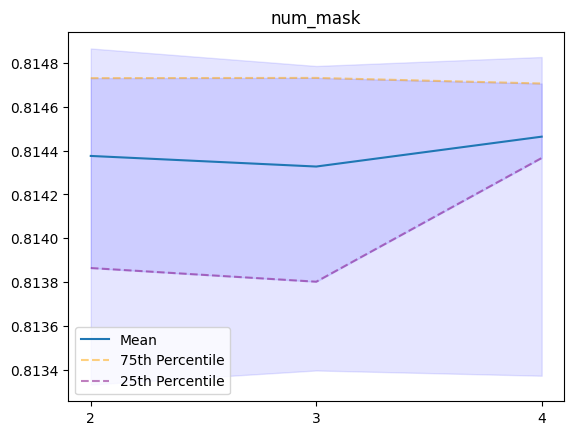

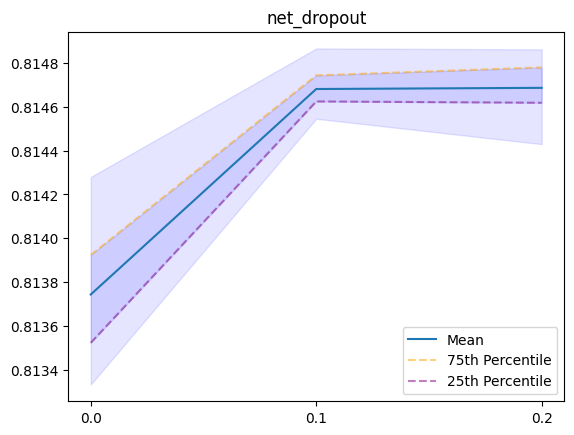

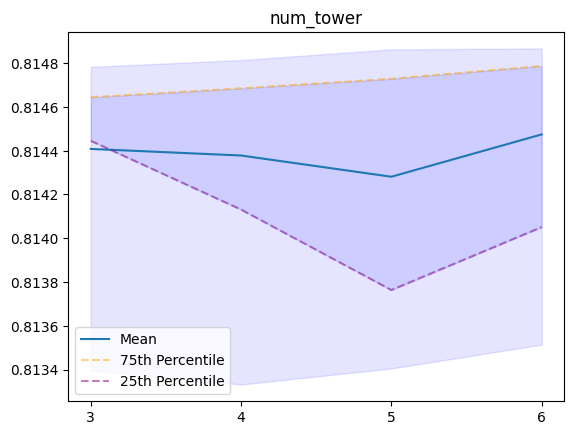

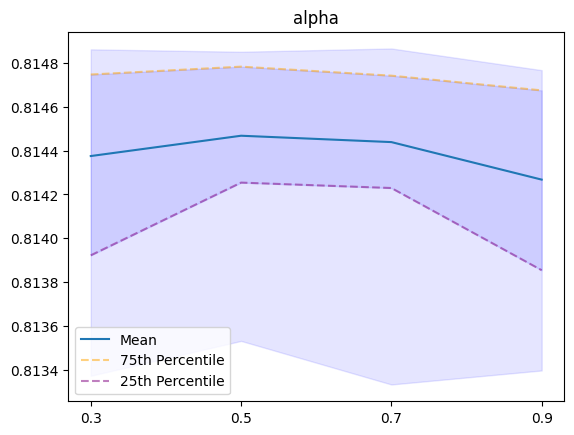

In [18]:
import matplotlib.pyplot as plt
import numpy as np

for col in multi_value_columns:
    x_label = hyper_df.groupby(col).max("AUC").index.values
    x = np.arange(len(x_label))
    
    quantile = hyper_df.groupby(col)["AUC"].quantile([0.25, 0.75]).values.reshape(-1, 2)
    top_quantile = quantile[:, 1]
    bot_quantile = quantile[:, 0]
    
    max_auc = hyper_df.groupby(col).max("AUC").values[:, 1]
    mean_auc = hyper_df.groupby(col).mean("AUC").values[:, 1]
    min_auc = hyper_df.groupby(col).min("AUC").values[:, 1]
    
    plt.plot(x, mean_auc, label="Mean")
    plt.fill_between(x, min_auc, max_auc, color="blue", alpha=0.1)
    plt.fill_between(x, bot_quantile, top_quantile, color="blue", alpha=0.1)
    
    # plt.plot(x, max_auc, color="red", linestyle="--", alpha=0.5, label="Max")  # Dotted line for max values
    # plt.plot(x, min_auc, color="green", linestyle="--", alpha=0.5, label="Min")  # Dotted line for min values
    plt.plot(x, top_quantile, color="orange", linestyle="--", alpha=0.5, label="75th Percentile")  # Dotted line for 75th percentile
    plt.plot(x, bot_quantile, color="purple", linestyle="--", alpha=0.5, label="25th Percentile")  # Dotted line for 25th percentile
    
    plt.xticks(ticks=x, labels=x_label)
    plt.title(col)
    plt.legend()
    plt.show()

In [19]:
hyper_df.sort_values("AUC", ascending=False).head(50)

,exp_id,logloss,AUC,alpha,net_dropout,num_mask,num_tower
66,SCV_light_loca_Criteo_086_82accc93,0.437099,0.814867,0.7,0.1,2,6
1,SCV_light_loca_Criteo_124_e244a2ae,0.437181,0.814863,0.3,0.2,2,5
39,SCV_light_loca_Criteo_135_398085f4,0.437175,0.814852,0.5,0.2,2,6
3,SCV_light_loca_Criteo_075_674f630b,0.437157,0.814830,0.5,0.1,2,5
11,SCV_light_loca_Criteo_095_09d4e47c,0.437296,0.814828,0.5,0.1,4,6
52,SCV_light_loca_Criteo_119_db6415a0,0.437170,0.814814,0.5,0.2,4,4
34,SCV_light_loca_Criteo_123_ed501254,0.437206,0.814806,0.5,0.2,2,5
76,SCV_light_loca_Criteo_134_0209ced4,0.437140,0.814805,0.7,0.2,2,6
26,SCV_light_loca_Criteo_142_acdd44d8,0.437206,0.814797,0.7,0.2,4,6
80,SCV_light_loca_Criteo_139_1d92346d,0.437262,0.814787,0.5,0.2,3,6


In [20]:
# hyper_df[hyper_df["block1_dropout"] <= 0.3]

In [21]:
hyper_df.value_counts("num_mask")

num_mask
2    30
3    28
4    28
Name: count, dtype: int64

In [22]:
hyper_df.value_counts("net_dropout")

net_dropout
0.2    30
0.1    29
0.0    27
Name: count, dtype: int64

In [23]:
hyper_df[(hyper_df["embedding_dim"] == 32) & hyper_df["use_feature_gating"] == True].sort_values("AUC", ascending=False).head(5)

KeyError: 'embedding_dim'

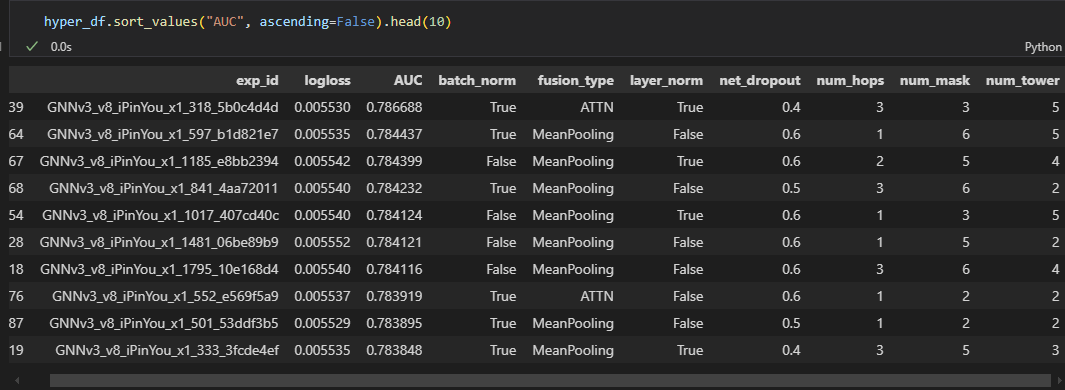

https://optuna.readthedocs.io/en/stable/reference/samplers/index.html

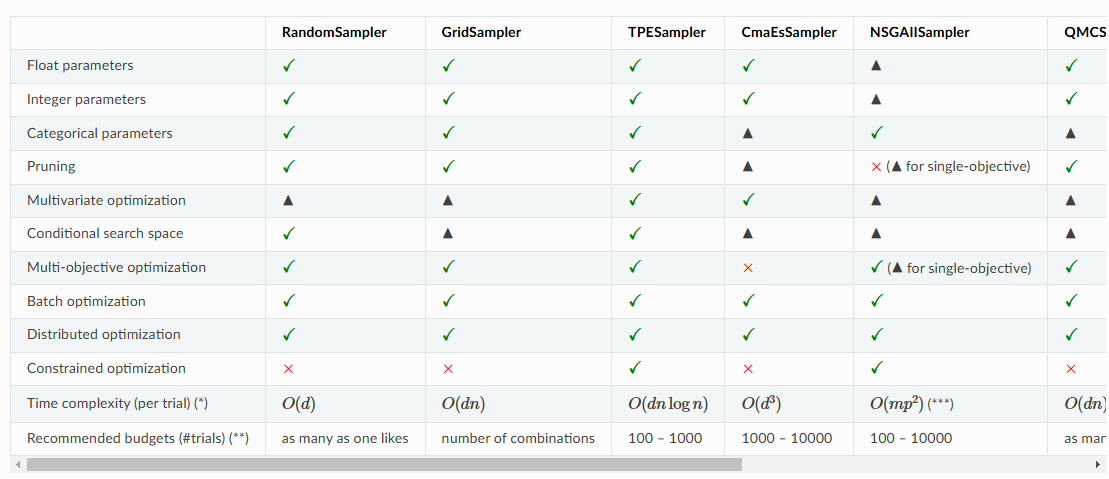

In [ ]:
for col in multi_value_columns:
    hyperparam_cnt_lst = np.array(hyper_df.groupby(col).count()["exp_id"].tolist())
    norm_lst = list(hyperparam_cnt_lst/total_exp_len)
    print(col)
    print(list(hyper_df.groupby(col).count().index))
    print([eval("{:.1f}".format(item*100)) for item in norm_lst])

In [ ]:
import numpy as np

probs = np.load("y_pred.npy")
probs

array([0.2478015 , 0.02584084, 0.67877942, ..., 0.60529333, 0.5425148 ,
       0.22743374])

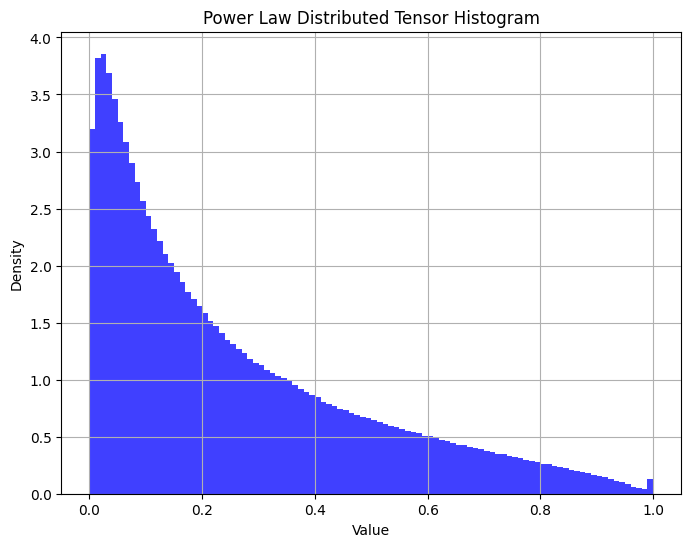

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
np.save("y_pred.npy", probs)
plt.hist(probs, bins=100, density=True, alpha=0.75, color='blue')
plt.title("Power Law Distributed Tensor Histogram")
plt.xlabel("Value")
plt.ylabel("Density")
plt.grid(True)
